In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from pathlib import Path
import matplotlib.pyplot as plt
from my_project import train
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.calibration import calibration_curve
import torch

In [ ]:
train_losses, train_accs, y_true, y_pred, losses, images, labels_list, preds, probs, true_labels = train.train(path='../data/interim/initial_data')

Epoch 1, Loss: 0.6898, Acc: 0.5637
Epoch 2, Loss: 0.6810, Acc: 0.5863
Epoch 3, Loss: 0.6732, Acc: 0.5463
Epoch 4, Loss: 0.6631, Acc: 0.6075


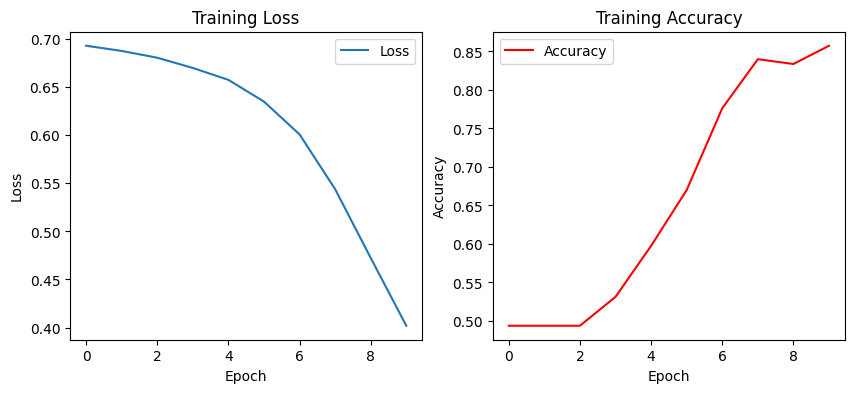

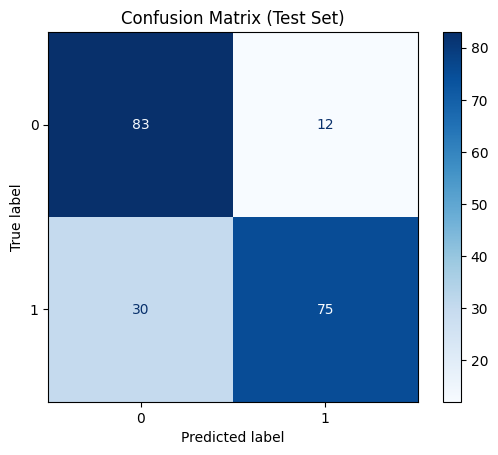

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


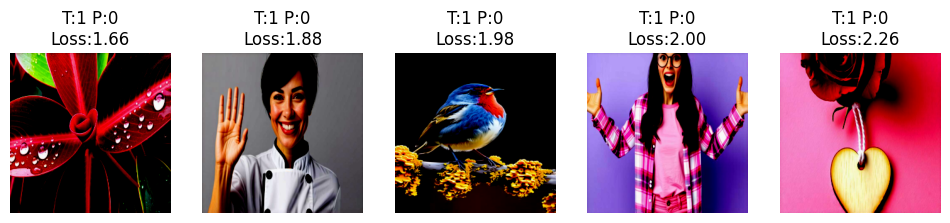

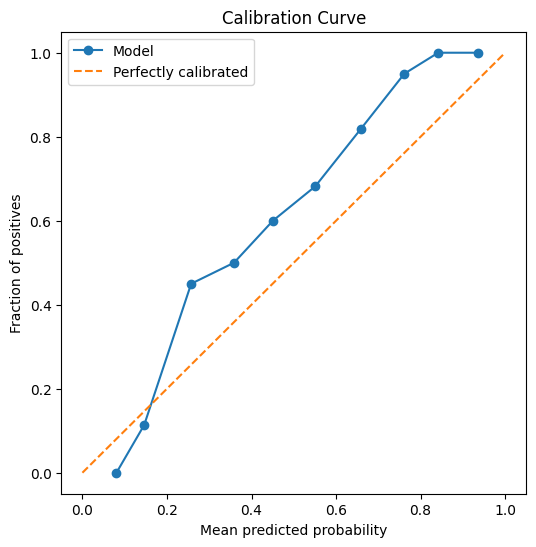

In [4]:
def imshow(img, title=""):
    img = img.numpy().transpose((1, 2, 0))
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label="Loss")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accs, label="Accuracy", color='red')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Test Set)")
plt.show()


idx_sorted = np.argsort(losses)[-5:]
plt.figure(figsize=(12,6))
for i, idx in enumerate(idx_sorted):
    plt.subplot(1,5,i+1)
    imshow(torch.tensor(images[idx]), f"T:{labels_list[idx]} P:{preds[idx]}\nLoss:{losses[idx]:.2f}")
plt.show()


prob_true, prob_pred = calibration_curve(true_labels, probs, n_bins=10)

plt.figure(figsize=(6,6))
plt.plot(prob_pred, prob_true, marker='o', label="Model")
plt.plot([0,1],[0,1], linestyle="--", label="Perfectly calibrated")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration Curve")
plt.legend()
plt.show()